## Brandon O'Briant
### Predict 422 Practical Machine Learning
### Boston Housing Study (Python)

In [2]:
# Data from the Boston Housing Study is utilized to evaluate
# regression modeling methods within a 10-fold 
# cross-validation design.

In [3]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [4]:
# even through we standardize X, y variables
# on input we will fit the intercept term in the models
# the expect fitted values will be close to zero
SET_FIT_INTERCEPT = True

In [5]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
#from pandas import set_option
#from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import os
import seaborn as sns

# modeling routines from Scikit Learn packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# for root mean-squared error calculation
from math import sqrt 

In [6]:
# function, takes in desired working directory path, changes the working directory
# to that path, and prints out the current working directory as a sanity check
def change_working_dir(path):
    os.chdir(path)
    #print("Current working directory:{}".format(str(os.getcwd())))

# gets assigned desired working directory--put your working directory here:***
WORKING_DIRECTORY_PATH = 'YOUR_WORKING_DIRECTORY_HERE'

# changes working dir to desire call    
change_working_dir(WORKING_DIRECTORY_PATH)

In [7]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'
init_plotting()
# avoid empty plot, always good to close plot
plt.close() 

In [8]:
# correlation heat map setup for seaborn
def corr_plot(df_corr):
    corr = df_corr.corr()
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    sns.heatmap(boston_input.corr(), mask=top, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    plt.show()

In [9]:
# csv filename is passed in,
# returns dataframe of csv data
def load_csv(filename):
    dataframe = pd.read_csv(filename)
    return dataframe

In [10]:
# prints shape of data, if there is no name associated with data (i.e. np.arrar)
# then it ommit the associate name
def print_shape(data, name = None):
    if name != None:
        data.name = name
        print("The shape of data, {}, is: {}".format(name, str(data.shape)))
    else:
        print("The shape of data is: {}".format(str(data.shape)))

In [11]:
# drop observations with missing data, if any
# examine the shape of input data after dropping missing data    
def dropna_print_shape(dataframe, name):
    if dataframe.isnull().values.any() == True:
        dataframe = dataframe.dropna()
        print("\n-----Dropped NAN values------\n")
        print_shape(dataframe, name)
    else:
        print("\n-----No NAN values------\n")
        print_shape(dataframe, name)
    return dataframe

In [12]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = load_csv('boston.csv')

In [13]:
# drop observations from bank DataFrame with missing data, if any
# examine the shape of input data after dropping missing data
boston_input = dropna_print_shape(boston_input, 'boston_input')


-----No NAN values------

The shape of data, boston_input, is: (506, 14)


In [14]:
# prints information, statistics, descriptions, data types, numerical correaltions,
# column values, about data passed in and 
# saves it to a txt file for review
def print_data_info_save_to_file(data, dataname):
    print('\n---------{} data informations----------\n'.format(dataname))
    print('\n{} data shape: {}'.format(dataname, data.shape))
    print('\n{} data dtypes: {}'.format(dataname, data.dtypes))
    print('\n{} data column values: {}'.format(dataname, data.columns.values)) 
    print('\n{} data first few rows: {}'.format(dataname, data.head())) 
    print('\n{} data look at end of data: {}'.format(dataname, data.tail()))
    print('\n{} data descriptive statistics: {}'.format(dataname, data.describe()))
    print('\n{} data numerical correlations: {}'.format(dataname, data.corr(method='pearson')))
    with open("{}_data_descriptive_information.txt".format(dataname), "w") as text_file:
        text_file.write('\n---------{} data informations----------\n'.format(dataname)+
                        '\n{} data shape: {}'.format(dataname, str(data.shape)) +
                        '\n{} data dtypes: {}'.format(dataname, str(data.dtypes)) +
                        '\n{} data column values: {}'.format(dataname, str(data.columns.values)) + 
                        '\n{} data first few rows: {}'.format(dataname, str(data.head()))+ 
                        '\n{} data look at end of data: {}'.format(dataname, str(data.tail()))+
                        '\n{} data descriptive statistics: {}'.format(dataname, str(data.describe()))+ 
                        '\n{} data information: {}'.format(dataname, str(data.info()))+
                        '\n{} data numerical correlation: {}'.format(dataname, str(boston_input.corr(method='pearson'))))

In [15]:
# for boston_input
# look at the list of column names, note that y is the response
# look at the beginning of the DataFrame
# Look at the end of the DataFrame
# compute descriptive statistics
# check column values
# calculate correlation between numeric values
print_data_info_save_to_file(boston_input, 'boston_input')


---------boston_input data informations----------


boston_input data shape: (506, 14)

boston_input data dtypes: neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object

boston_input data column values: ['neighborhood' 'crim' 'zn' 'indus' 'chas' 'nox' 'rooms' 'age' 'dis' 'rad'
 'tax' 'ptratio' 'lstat' 'mv']

boston_input data first few rows:   neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  

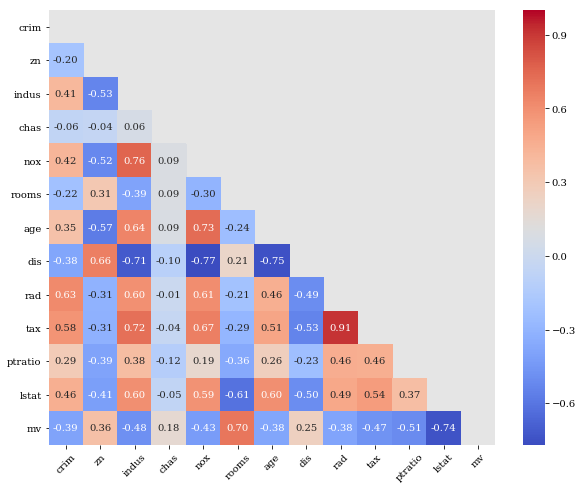

In [16]:
# plot the numerical correlations
boston_input_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'mv']
corr_plot(boston_input)   

In [17]:
#create histogram plots to examine distributions
# saves image to pdf
def hist_density_plots(data, dataname, title, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.distplot, 'value')
    plt.title(title)
    plt.title(title)
    plt.savefig('Hist-Density-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    plt.close()

In [18]:
# creates/shows seaborn boxplot
# saves image to pdf 
def box_plot(data, dataname, title, features):
    d = data
    f = features
    g = pd.melt(d, value_vars = f)
    gm = sns.FacetGrid(g, col='variable', col_wrap = 4, sharex = False, sharey = False)
    gm = gm.map(sns.boxplot, 'value')
    plt.title('Box Plot-{}-')
    plt.title(title)
    plt.savefig('Boxplot-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    plt.close()

In [19]:
   
# creates and shows seaborn pairplot (scatter matrix)
# saves image to pdf    
def scatter_matrix(data, dataname, title, features):
    d = data
    sns.pairplot(d)
    plt.title(title)

    plt.savefig('Scatte-Matrix-{}.pdf'.format(dataname), 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None)
    plt.show()
    #plt.close()

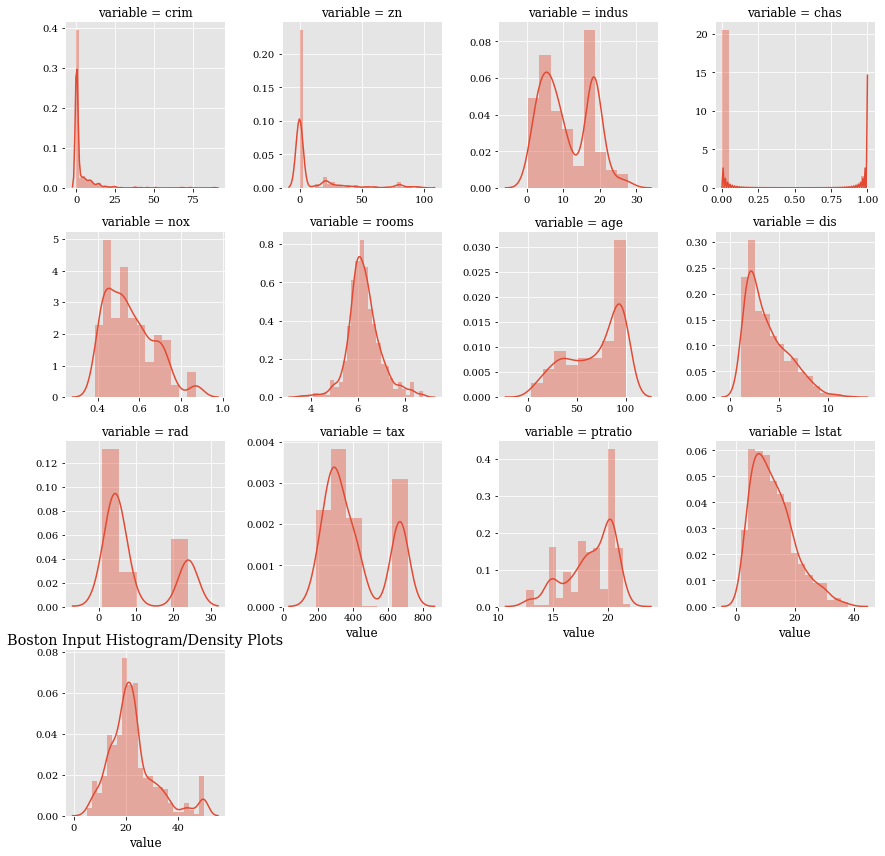

In [20]:
# histogram/density plots for boston_input 
hist_density_plots(boston_input, 'Boston-Input', 'Boston Input Histogram/Density Plots',
                   boston_input_features)

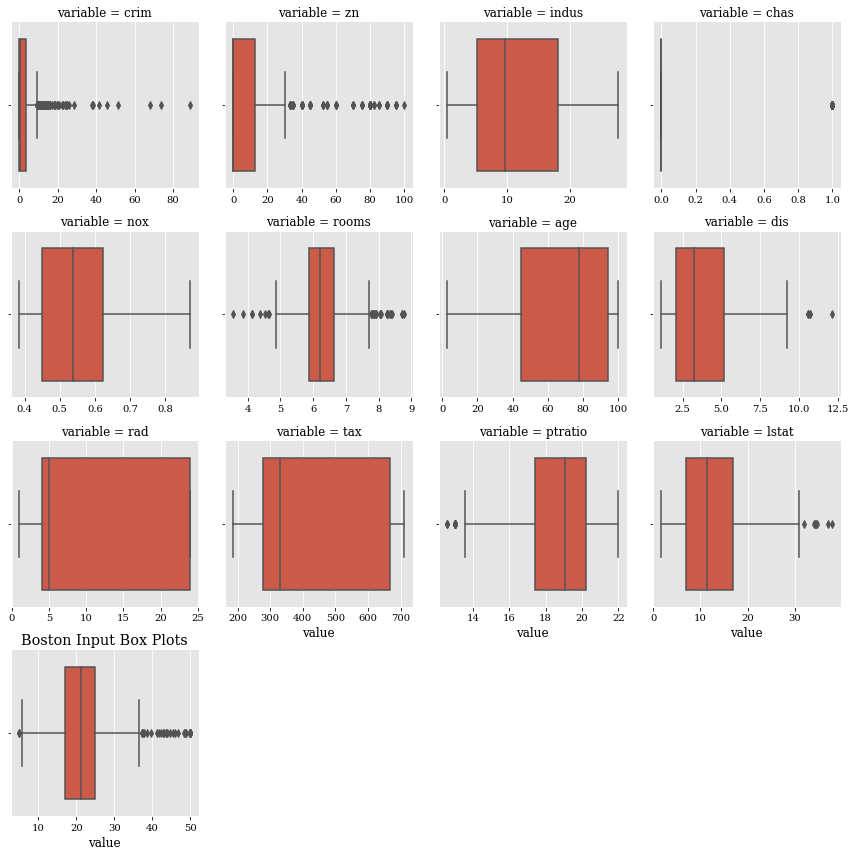

In [21]:
# box plots for boston_input 
box_plot(boston_input, 'Boston-Input', 'Boston Input Box Plots', 
         boston_input_features)

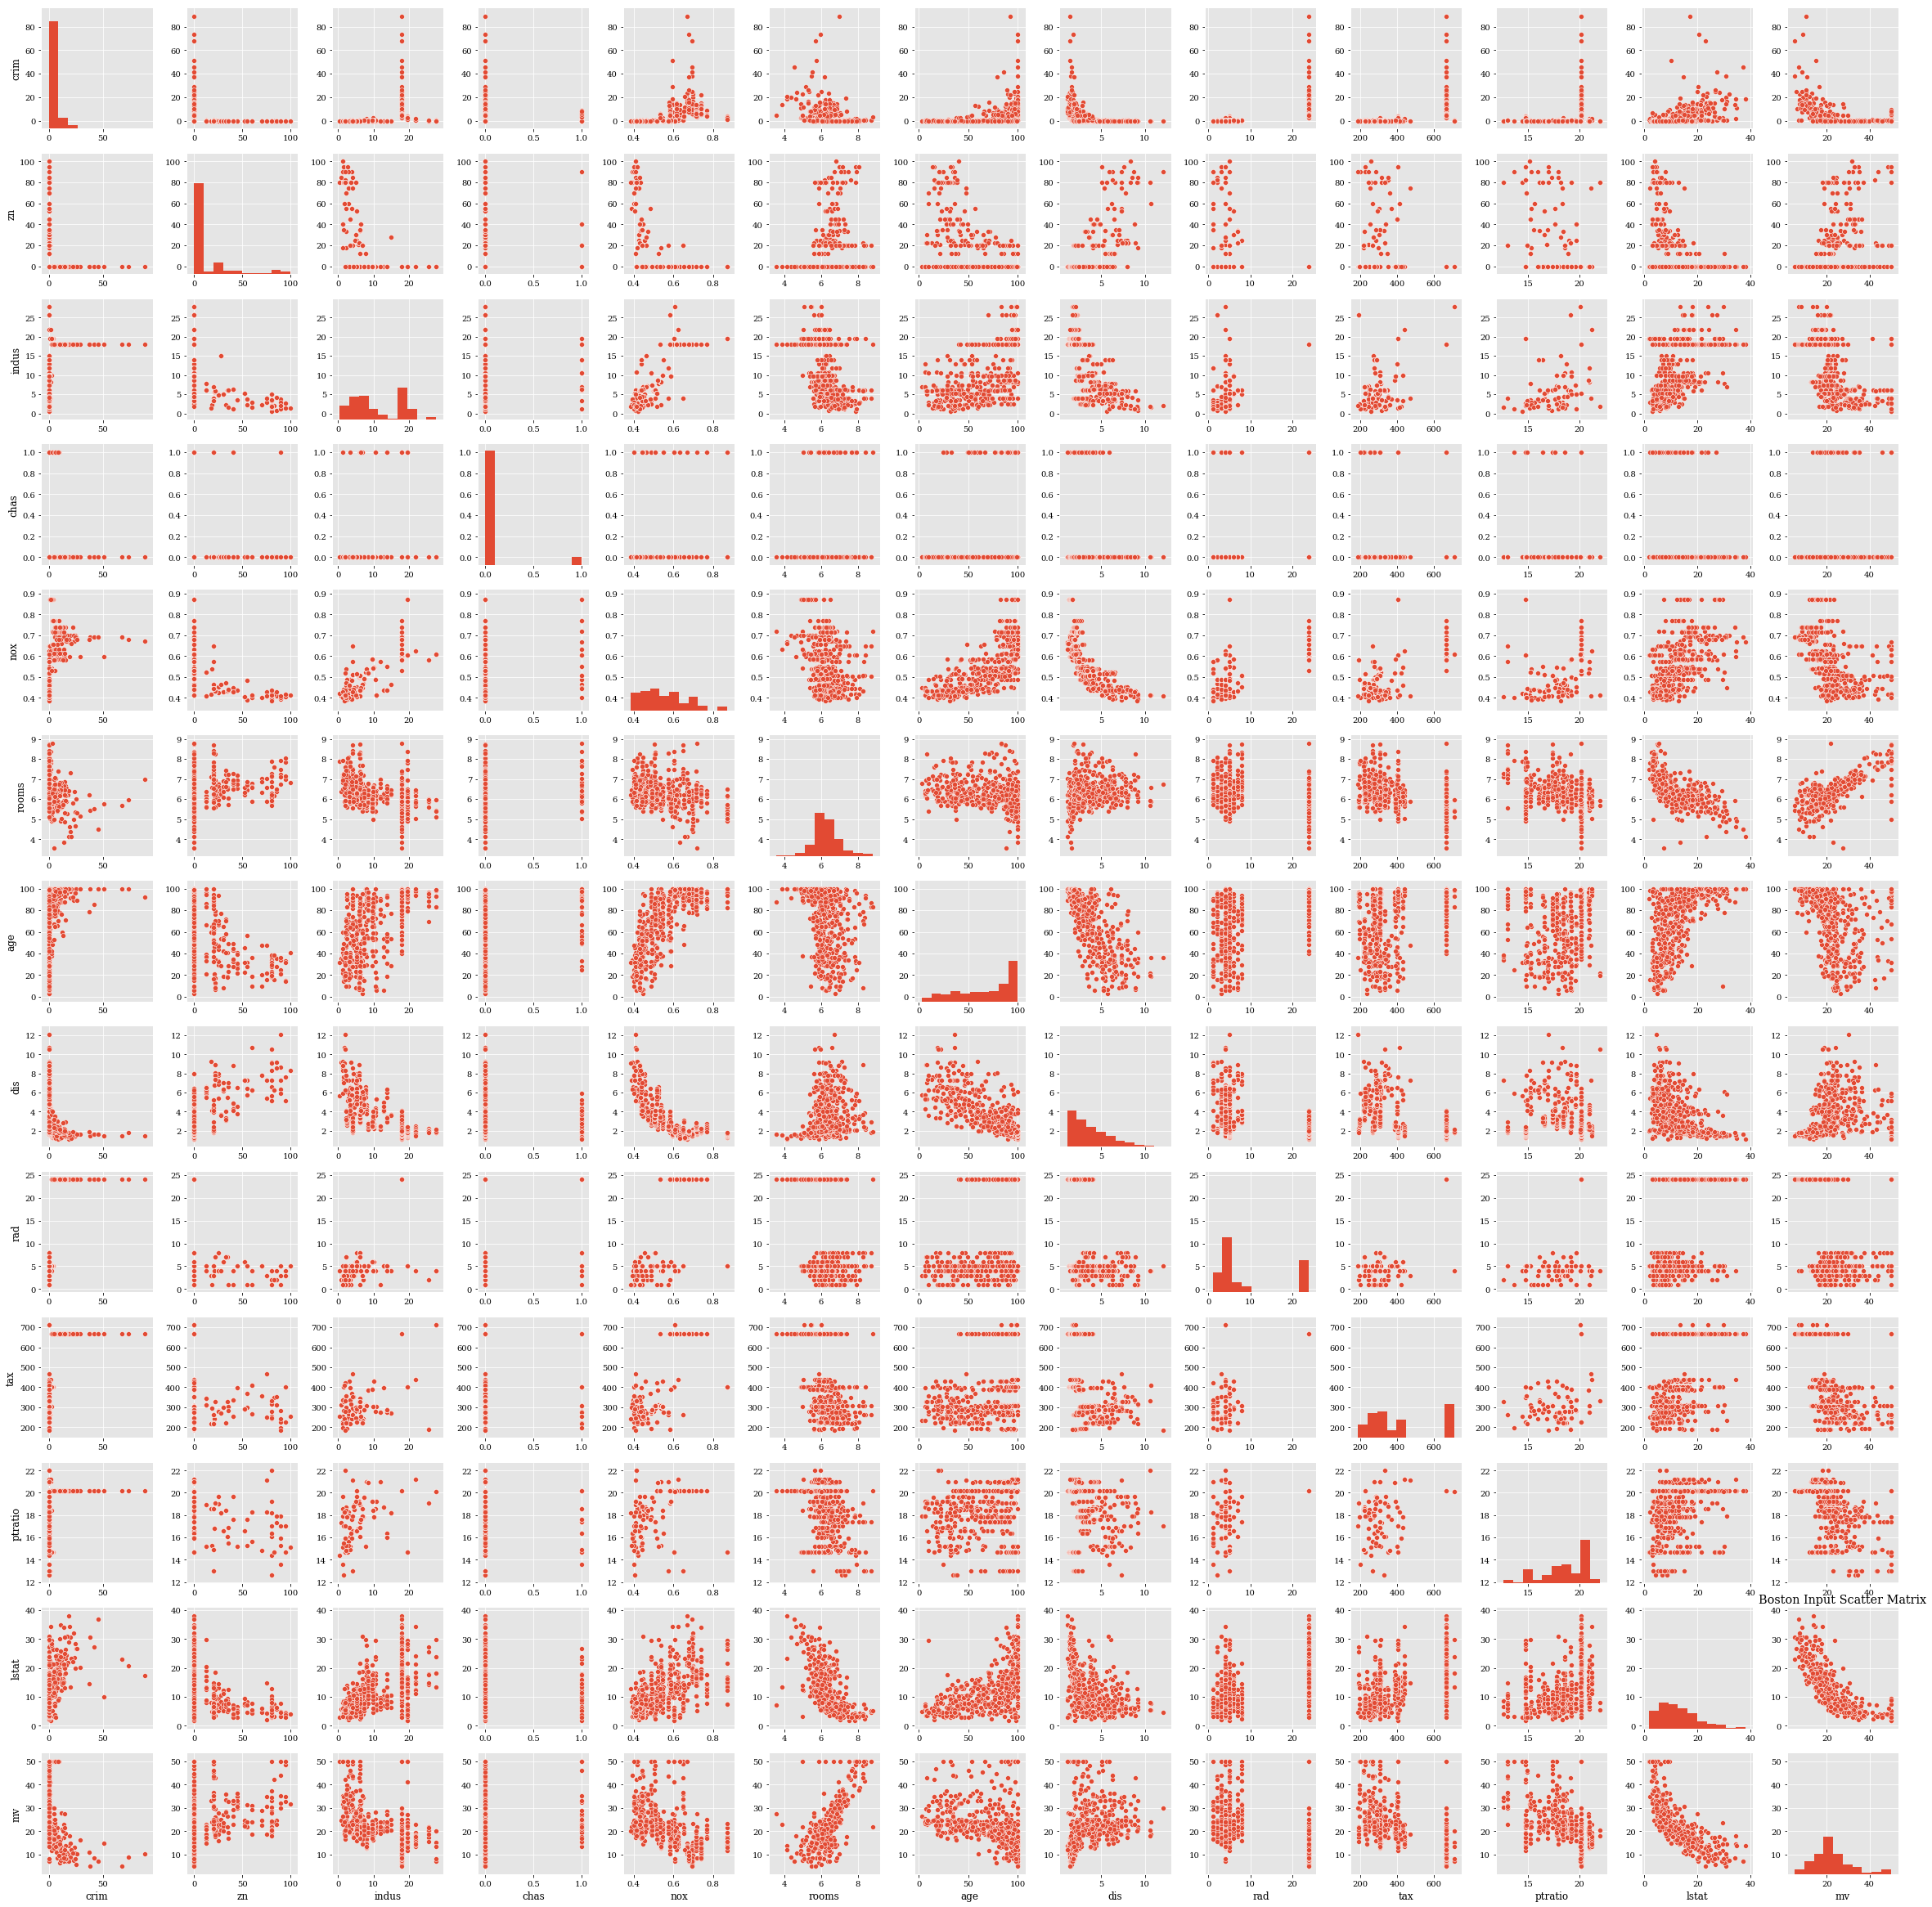

In [22]:
# scatter matrix plots for boston_input 
scatter_matrix(boston_input, 'Boston-Input', 'Boston Input Scatter Matrix',
               boston_input_features)    
    

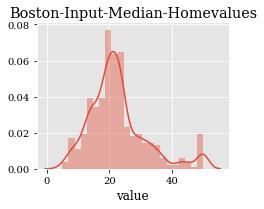

In [23]:
# histogram of attributes in pandas DataFrame, object boston_input
hist_density_plots(boston_input, 'Boston', 'Boston-Input-Median-Homevalues', 'mv')

In [24]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

In [25]:
# prints stats information about Boston data 
# saves results to txt file
print_data_info_save_to_file(boston, 'Boston')


---------Boston data informations----------


Boston data shape: (506, 13)

Boston data dtypes: crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rooms      float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
mv         float64
dtype: object

Boston data column values: ['crim' 'zn' 'indus' 'chas' 'nox' 'rooms' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'lstat' 'mv']

Boston data first few rows:       crim    zn  indus  chas    nox  rooms   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat    m

In [26]:
# set up preliminary data for data for fitting the models 
# the first column is the log median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([np.log(boston.mv),\
   boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

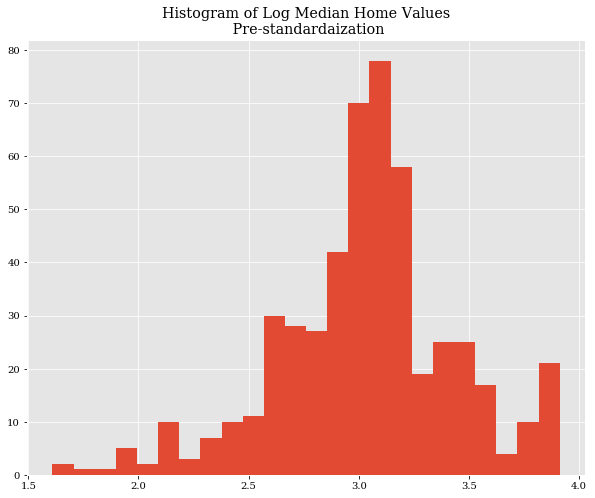

In [27]:
# histogram ofkind = 'hist', title ='Histogram Median Home Values' attributes in pandas DataFrame, object boston_input
plt.hist(prelim_model_data[:,0], bins = 'auto')
plt.title('Histogram of Log Median Home Values\n Pre-standardaization')
plt.savefig('Hist-Log-Median-Home-Values.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [28]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\n Preliminary Model Data dimensions:', prelim_model_data.shape)


 Preliminary Model Data dimensions: (506, 13)


In [29]:
# standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [30]:
# show standardization constants being employed
print('\n Preliminary Model Data standardization constants:\n')
print(scaler.mean_)
print(scaler.scale_)


 Preliminary Model Data standardization constants:

[  3.03455800e+00   3.61352356e+00   1.13636364e+01   1.11367787e+01
   6.91699605e-02   5.54695059e-01   6.28463439e+00   6.85749012e+01
   3.79504269e+00   9.54940711e+00   4.08237154e+02   1.84555336e+01
   1.26530632e+01]
[  4.07871084e-01   8.59304135e+00   2.32993957e+01   6.85357058e+00
   2.53742935e-01   1.15763115e-01   7.01922514e-01   2.81210326e+01
   2.10362836e+00   8.69865112e+00   1.68370495e+02   2.16280519e+00
   7.13400164e+00]


In [31]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


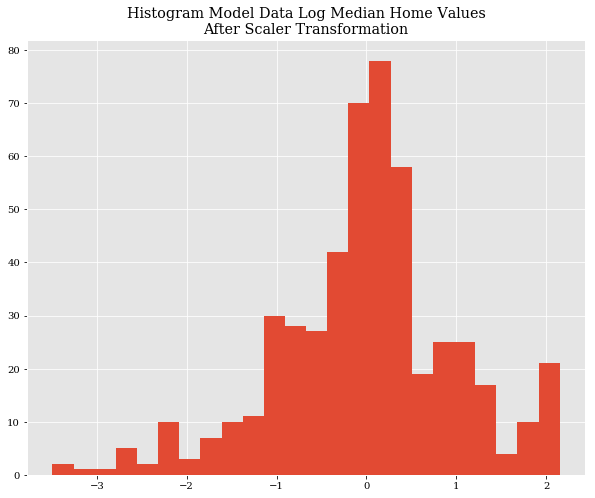

In [32]:
plt.hist(model_data[:,0], bins = 'auto')
plt.title('Histogram Model Data Log Median Home Values\nAfter Scaler Transformation')
plt.savefig('Hist-Model-Data-Log-Median-Home-Values-After-Scaler-Transformation.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [33]:
with open("Before-After-Standarizatoin-For-Modeling.txt", "w") as text_file:
    text_file.write('\n Preliminary Model Data dimensions:'+
                    '\n----------------------------------\n'+
                    str(prelim_model_data.shape)+
                    '\n Preliminary Model Data Standard Scores for Columns:'+
                    '\n-------------------------------------------------\n'+
                    str(scaler.fit(prelim_model_data))+
                    '\n Preliminary Model Data standardization constants:\n'+
                    '----------------------------------------------------\n'+
                    'Scaler Mean: '+ str(scaler.mean_)+ 
                    '\nScaler Scale: '+ str(scaler.scale_)+
                    '\nDimensions for model_data:\n'+
                    str(model_data.shape))

In [34]:
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls

# list of regression model names
names = ['ElasticNet_Regression', 'Lasso_Regression','Linear_Regression', 
         'Ridge_Regression'] 

# list of regressors
regressors = [ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                          max_iter=10000, tol=0.01, 
                          fit_intercept = SET_FIT_INTERCEPT, 
                          normalize = False, 
                          random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     random_state = RANDOM_SEED),
              LinearRegression(fit_intercept = SET_FIT_INTERCEPT),
              Ridge(alpha = 1, solver = 'cholesky', 
                     fit_intercept = SET_FIT_INTERCEPT, 
                     normalize = False, 
                     random_state = RANDOM_SEED)]

In [35]:
# --------------------------------------------------------
# ten-fold cross-validation employed here

In [36]:
# N_FOLDS, intialized to 10 for ten-fold cross-validation
N_FOLDS = 10

In [37]:
# cv_results, numpy array, stores cross validation results
cv_results = np.zeros((N_FOLDS, len(names)))

In [38]:
# kf, sets up KFold 
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

In [39]:
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold)
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    # variable index_for_method, initialize to zero
    index_for_method = 0 
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result,
              '\n--------------------------------------------------------\n')
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
    
    index_for_fold += 1


Fold index: 0

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: ElasticNet_Regression
  Scikit Learn method: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.01, warm_start=False)
Fitted regression intercept: 0.0137678354513
Fitted regression coefficients: [-0.14501515  0.         -0.          0.0409552  -0.0088081   0.17975848
  0.         -0.00801084 -0.         -0.07496835 -0.11567937 -0.47655932]
Coefficient of determination (R-squared): 0.770195162977
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 0.3135510808714884 
---

In [40]:
# cv_results_df, pandas DataFrame, store cross validation results
cv_results_df = pd.DataFrame(cv_results)

In [41]:
# cv_results_df, gets column names from DataFrame and stores them to variable names
cv_results_df.columns = names
with open("cv-results.txt", "w") as text_file:
    text_file.write('\nCross validation results:\n'+
                    str(cv_results_df)+
                    '\nCross validation results column names:\n'+
                    str(names))

In [42]:
pd.set_option('precision', 5)
print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod Root mean-squared error', sep = '') 
print(cv_results_df.mean())   
with open("cv-results-df-mean.txt", "w") as text_file:
    text_file.write('\nAverage results from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                    'in standardized units (mean 0, standard deviation 1)\n'+
                     '\nMethod Root mean-squared error:\n'+ 
                     str(cv_results_df.mean()))


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method Root mean-squared error
ElasticNet_Regression    0.51885
Lasso_Regression         0.54441
Linear_Regression        0.49645
Ridge_Regression         0.49569
dtype: float64
